<a href="https://colab.research.google.com/github/Nicolas9529/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [2]:
import pandas as pd

In [3]:
url= 'https://raw.githubusercontent.com/Nicolas9529/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

Se normaliza cada una de las columnas del data frame original.

In [4]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

Ejemplo de data frame

In [5]:
df_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


Concatenamos los df obteniendo del original el customer ID y Churn, el resto de columnas se obtienen de los data frames obtenidos anteriormente

In [6]:
df_completo = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df_completo

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Se obtiene el tipo de datos que se encuentran en cada una de las columnas

In [7]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Revisamos la cantidad de celdas con valores nulos y duplicados

In [8]:
print(df_completo.isnull().sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [9]:
print("Total de filas duplicadas:", df_completo.duplicated().sum())

Total de filas duplicadas: 0


Anteriormente no se encontraron duplicados ni valores nulos aparentes. No obstante, para asegurarnos de que estos datos no contengan errores ocultos, cambiaremos la columna Charges.Total a formato numérico (Debido a que esta debiese ser una columna de tipo int o float pero arroja que es object lo que nos da un indicio de datos no coherentes). Utilizando el parámetro errors='coerce', forzaremos que los espacios en blanco se transformen en verdaderos valores nulos (NaN).

In [10]:
df_completo['Charges.Total'] = pd.to_numeric(df_completo['Charges.Total'], errors='coerce')
print(f'Nulos descubiertos en Charges.Total: {df_completo['Charges.Total'].isnull().sum()}')
print(f'Clientes duplicados encontrados: {df_completo.duplicated().sum()}')

Nulos descubiertos en Charges.Total: 11
Clientes duplicados encontrados: 0


In [11]:
df_completo = df_completo.dropna(subset=['Charges.Total'])
df_completo.shape

(7256, 21)

Se encontraron 11 valores nulos los cuales son eliminados debido a que no causará un mayor impacto en el análisis ya que son menos del 1% del total de datos. A continuación, procedemos a inspeccionar toda la tabla y sus categorías utilizando la función unique(). Esto nos permite obtener los valores distintos presentes en cada columna de texto, con el objetivo de identificar anomalías, espacios en blanco o inconsistencias que deban ser corregidas.

In [12]:
print("REVISIÓN DE CATEGORÍAS EN TODA LA TABLA:")
for columna in df_completo.columns:
    if df_completo[columna].dtype == 'object' and columna != 'customerID':
        print(f"{columna}")
        print(df_completo[columna].unique())
        print("")

REVISIÓN DE CATEGORÍAS EN TODA LA TABLA:
Churn
['No' 'Yes' '']

gender
['Female' 'Male']

Partner
['Yes' 'No']

Dependents
['Yes' 'No']

PhoneService
['Yes' 'No']

MultipleLines
['No' 'Yes' 'No phone service']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'Yes' 'No internet service']

OnlineBackup
['Yes' 'No' 'No internet service']

DeviceProtection
['No' 'Yes' 'No internet service']

TechSupport
['Yes' 'No' 'No internet service']

StreamingTV
['Yes' 'No' 'No internet service']

StreamingMovies
['No' 'Yes' 'No internet service']

Contract
['One year' 'Month-to-month' 'Two year']

PaperlessBilling
['Yes' 'No']

PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']



La columna Churn es nuestra Variable Objetivo (Target). Dado que el propósito del proyecto es predecir el abandono de clientes, los registros con valores vacíos no aportan información útil para el aprendizaje del modelo. Mantenerlos introduciría ruido y reduciría la precisión de las predicciones, por lo que la eliminación de estos 224 registros es necesaria para garantizar la calidad del set de datos.

In [13]:
vacios = (df_completo['Churn'] == '').sum()
print(f'Clientes vacios sin datos de Churn detectados: {vacios}')

df_completo = df_completo[df_completo['Churn'] != '']

print("\nCategorías en Churn después de limpiar:")
print(df_completo['Churn'].unique())

print(f"\nTamaño final de la base de datos limpia: {df_completo.shape}")

Clientes vacios sin datos de Churn detectados: 224

Categorías en Churn después de limpiar:
['No' 'Yes']

Tamaño final de la base de datos limpia: (7032, 21)


Con los datos ya depurados, procedemos a realizar una columna nueva. En esta etapa, crearemos la nueva columna Cuentas_Diarias a partir de la facturación mensual (Charges.Monthly). El objetivo es obtener una métrica de consumo diario prorrateada (basada en un mes estándar de 30 días), lo que nos permitirá analizar el comportamiento del gasto de los clientes con un mayor nivel de detalle estadístico.

In [14]:
df_completo['Cuentas_Diarias'] = df_completo['Charges.Monthly'] / 30

df_completo['Cuentas_Diarias'] = df_completo['Cuentas_Diarias'].round(2)

print(df_completo[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head())

   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6             2.19
1  0003-MKNFE             59.9             2.00
2  0004-TLHLJ             73.9             2.46
3  0011-IGKFF             98.0             3.27
4  0013-EXCHZ             83.9             2.80


#📊 Carga y análisis

In [15]:
# Estadísticas de columnas numéricas
print("RESUMEN ESTADÍSTICO NUMÉRICO:")
display(df_completo.describe().round(2))

# Estadísticas de columnas de texto
print("\nRESUMEN DE VARIABLES CATEGÓRICAS:")
display(df_completo.describe(include='object'))

RESUMEN ESTADÍSTICO NUMÉRICO:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7032.00,7032.00,7032.00,7032.00,7032.00
mean,0.16,32.42,64.80,2283.30,2.16
std,0.37,24.55,30.09,2266.77,1.00
min,0.00,1.00,18.25,18.80,0.61
25%,0.00,9.00,35.59,401.45,1.19
50%,0.00,29.00,70.35,1397.48,2.34
75%,0.00,55.00,89.86,3794.74,2.99
max,1.00,72.00,118.75,8684.80,3.96



RESUMEN DE VARIABLES CATEGÓRICAS:


,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


Inestabilidad Contractual: El 55% de la base de clientes utiliza contratos mes a mes, lo que representa un alto riesgo de fuga inmediata.

Segmentación de Gasto: Existe una brecha amplia de facturación; mientras el promedio es de 64.8 USD  los clientes "Premium" llegan a pagar casi el doble (118.7USD).

Ventana de Riesgo: La desviación estándar en tenure (24 meses) y un primer cuartil de solo 9 meses confirman que el abandono se concentra en clientes nuevos.

Perfil Tecnológico: La Fibra Óptica y el Cheque Electrónico son las categorías dominantes, marcando el perfil del usuario promedio a analizar.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

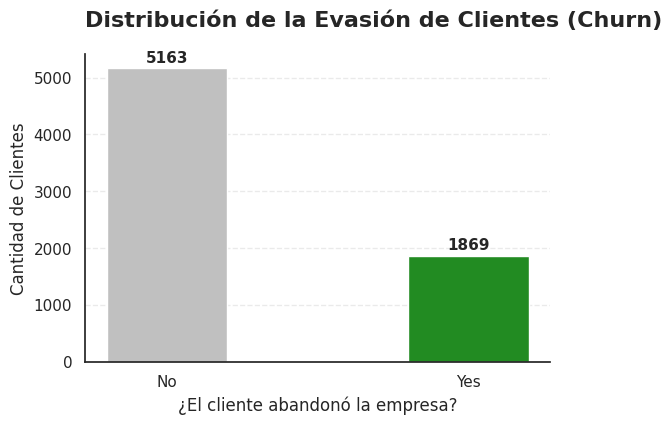

In [31]:
conteo_churn = df_completo['Churn'].value_counts()
colores = ['silver', 'forestgreen']

fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(conteo_churn.index, conteo_churn.values, color=colores, width=0.4)

ax.set_title('Distribución de la Evasión de Clientes (Churn)', loc='left', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('¿El cliente abandonó la empresa?', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.4)

for i, v in enumerate(conteo_churn.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

total = len(df_completo)
porcentaje_yes = (conteo_churn['Yes'] / total * 100).round(2)


La tasa de evasión es del 26.58% (1,869 clientes), una cifra crítica que requiere intervención inmediata

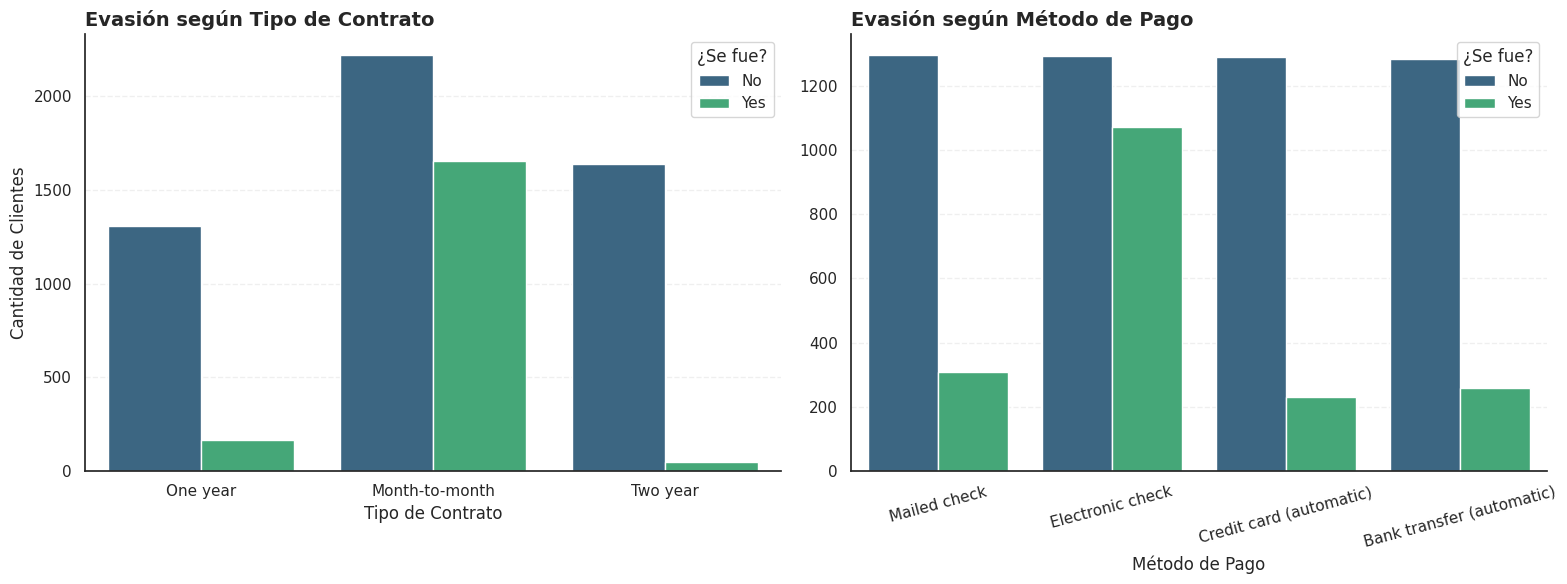

In [22]:
sns.set_theme(style="white")
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df_completo, x='Contract', hue='Churn', ax=axs[0], palette='viridis')
axs[0].set_title('Evasión según Tipo de Contrato', fontsize=14, fontweight='bold', loc='left')
axs[0].set_xlabel('Tipo de Contrato')
axs[0].set_ylabel('Cantidad de Clientes')
axs[0].legend(title='¿Se fue?')

sns.countplot(data=df_completo, x='PaymentMethod', hue='Churn', ax=axs[1], palette='viridis')
axs[1].set_title('Evasión según Método de Pago', fontsize=14, fontweight='bold', loc='left')
axs[1].set_xlabel('Método de Pago')
axs[1].set_ylabel('')
plt.xticks(rotation=15)
axs[1].legend(title='¿Se fue?')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Se confirma que el contrato mensual y el cheque electrónico son los principales disparadores de fuga

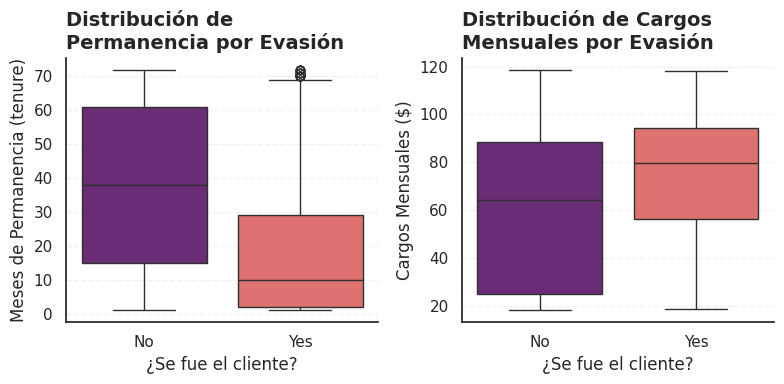

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(data=df_completo, x='Churn', y='tenure', ax=axs[0], palette='magma', hue='Churn', legend=False)
axs[0].set_title('Distribución de\nPermanencia por Evasión', fontsize=14, fontweight='bold', loc='left')
axs[0].set_xlabel('¿Se fue el cliente?')
axs[0].set_ylabel('Meses de Permanencia (tenure)')

sns.boxplot(data=df_completo, x='Churn', y='Charges.Monthly', ax=axs[1], palette='magma', hue='Churn', legend=False)
axs[1].set_title('Distribución de Cargos\nMensuales por Evasión', fontsize=14, fontweight='bold', loc='left')
axs[1].set_xlabel('¿Se fue el cliente?')
axs[1].set_ylabel('Cargos Mensuales ($)')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Los clientes con mayor gasto mensual y menor antigüedad son los más propensos a abandonar el servicio

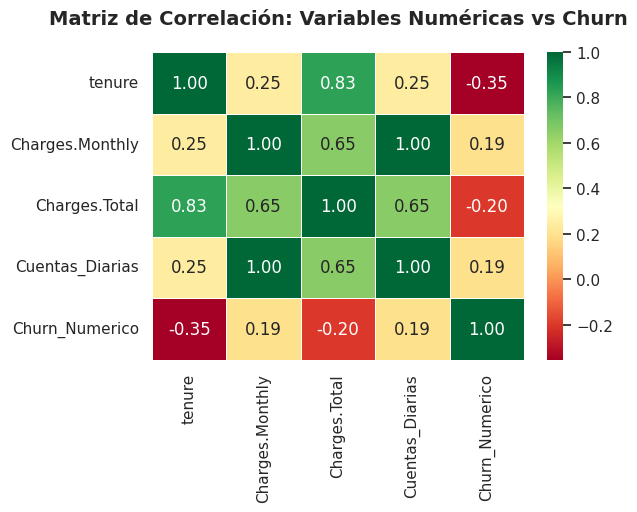

In [30]:
df_correlacion = df_completo.copy()
df_correlacion['Churn_Numerico'] = df_correlacion['Churn'].map({'Yes': 1, 'No': 0})

columnas_interes = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Churn_Numerico']
matriz_corr = df_correlacion[columnas_interes].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_corr, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlación: Variables Numéricas vs Churn', fontsize=14, fontweight='bold', pad=20)
plt.show()

Factor de Retención (Antigüedad): La correlación negativa más fuerte (-0.35) con el Churn es la antigüedad (tenure). Esto valida estadísticamente que a mayor tiempo de permanencia, menor es el riesgo de fuga.

Factor de Riesgo (Precio): Los cargos mensuales muestran una correlación positiva (0.19). Aunque moderada, confirma que el incremento en el costo del servicio actúa como un impulsor del abandono.

Dependencia de Variables: La alta correlación entre Charges.Total y tenure (0.83) ratifica que el ingreso acumulado depende drásticamente de la capacidad de retener al cliente a largo plazo.

#📄Informe final

##**1-. Introducción**

El presente informe técnico surge ante la necesidad de TelecomX de abordar una tasa de deserción de clientes (Churn Rate) del 26.58%, cifra que impacta directamente en la estabilidad financiera y el crecimiento de la compañía.

El objetivo principal de este análisis es identificar los patrones críticos y las variables que impulsan la pérdida de usuarios. Para ello, se ha procesado una base de datos histórica mediante un flujo de trabajo estructurado en tres fases:

1-. Limpieza y Tratamiento de Datos: Garantizando la integridad de la información mediante el manejo de valores nulos y la creación de métricas de consumo diario.

2-. Análisis Exploratorio de Datos (EDA): Identificación de tendencias mediante visualizaciones estadísticas y análisis de correlación.

3-. Generación de Insights y Estrategia: Presentación de hallazgos clave y recomendaciones accionables para mitigar la fuga de clientes.

##**2-. Limpieza y tratamiento de datos**

La ingesta de datos se realizó desde un archivo JSON con estructuras anidadas. Se procedió a la normalización y concatenación de los distintos DataFrames para construir un único conjunto de datos sólido de 21 columnas.

Se detectó que la columna Charges.Total estaba tipificada como object. Al realizar la conversión a tipo numérico (float), se identificaron 11 valores nulos que permanecían ocultos. Dada la baja representatividad de estos casos (menos del 0.2%), se optó por su eliminación para no sesgar las estadísticas generales.

Mediante la exploración de valores únicos, se detectaron celdas vacías en la columna Churn. Al ser esta la variable objetivo del análisis, cualquier intento de imputación (relleno) comprometería la fiabilidad de los resultados. Por lo tanto, se decidió eliminar estos registros para garantizar un DataFrame limpio y consistente para el análisis exploratorio.

##**3-.  Análisis Exploratorio de Datos**

###**3.1-.Distribución de la Evasión (Churn)**

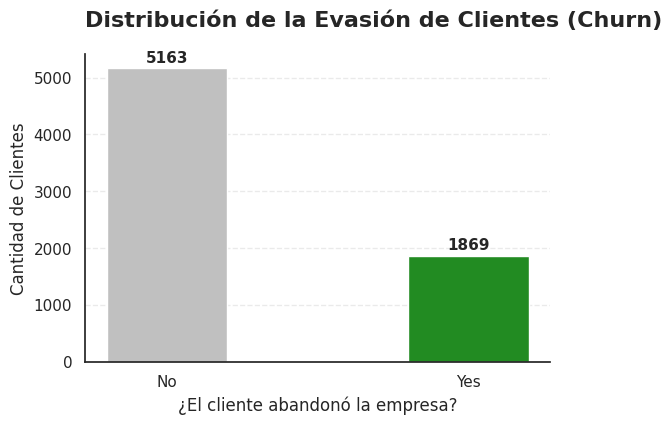

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(conteo_churn.index, conteo_churn.values, color=colores, width=0.4)

ax.set_title('Distribución de la Evasión de Clientes (Churn)', loc='left', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('¿El cliente abandonó la empresa?', fontsize=12)
ax.set_ylabel('Cantidad de Clientes', fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.4)

for i, v in enumerate(conteo_churn.values):
    ax.text(i, v + 50, str(v), ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

total = len(df_completo)
porcentaje_yes = (conteo_churn['Yes'] / total * 100).round(2)

El gráfico muestra una desproporción clara entre clientes activos y aquellos que han abandonado la empresa. Se cuantifica una pérdida de 1.869 clientes, lo que establece la tasa de evasión en un 26,58%. Esta cifra servirá como línea base para los análisis siguientes.

###**3.2-.Impacto del Tipo de Contrato y Método de Pago**

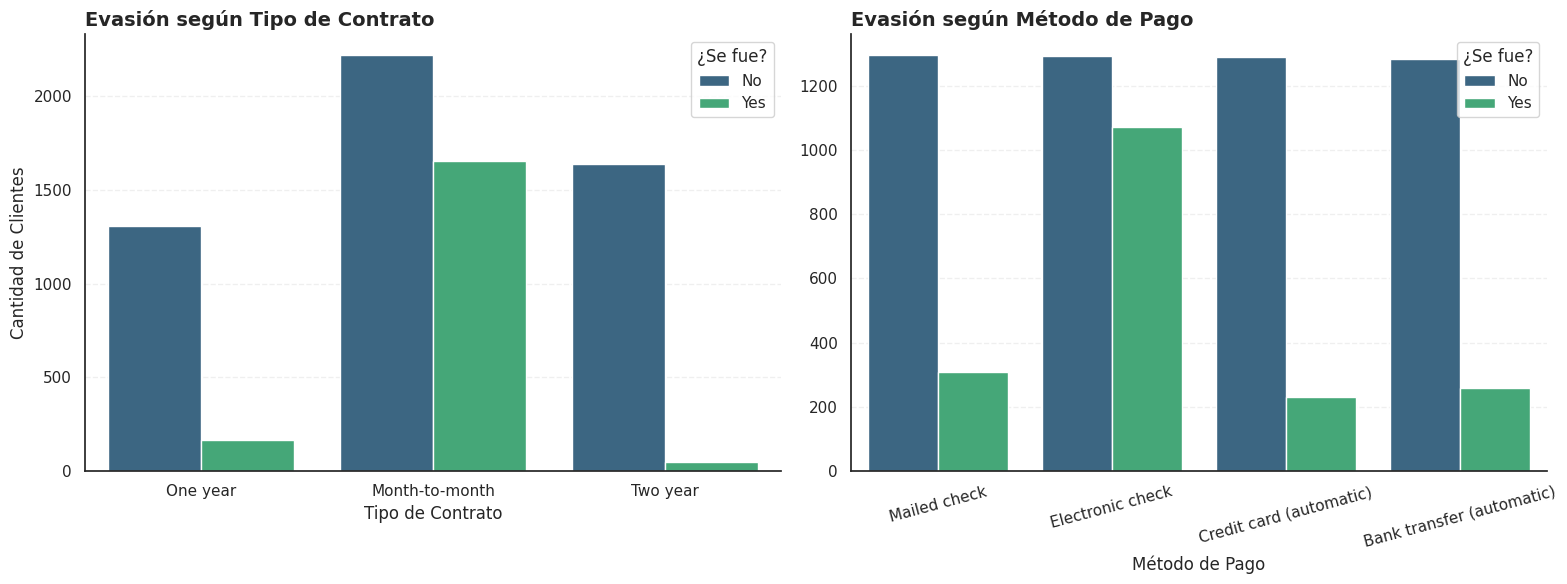

In [33]:
sns.set_theme(style="white")
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df_completo, x='Contract', hue='Churn', ax=axs[0], palette='viridis')
axs[0].set_title('Evasión según Tipo de Contrato', fontsize=14, fontweight='bold', loc='left')
axs[0].set_xlabel('Tipo de Contrato')
axs[0].set_ylabel('Cantidad de Clientes')
axs[0].legend(title='¿Se fue?')

sns.countplot(data=df_completo, x='PaymentMethod', hue='Churn', ax=axs[1], palette='viridis')
axs[1].set_title('Evasión según Método de Pago', fontsize=14, fontweight='bold', loc='left')
axs[1].set_xlabel('Método de Pago')
axs[1].set_ylabel('')
plt.xticks(rotation=15)
axs[1].legend(title='¿Se fue?')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Al desglosar la evasión por variables categóricas, se observa que el contrato "Month-to-month" absorbe casi la totalidad de las bajas. Asimismo, el método de pago por cheque electrónico muestra una frecuencia de abandono significativamente superior a los métodos automáticos (tarjeta de crédito o transferencia bancaria).

###**3.3-.Comportamiento de Variables Numéricas (Tenure y Cargos)**

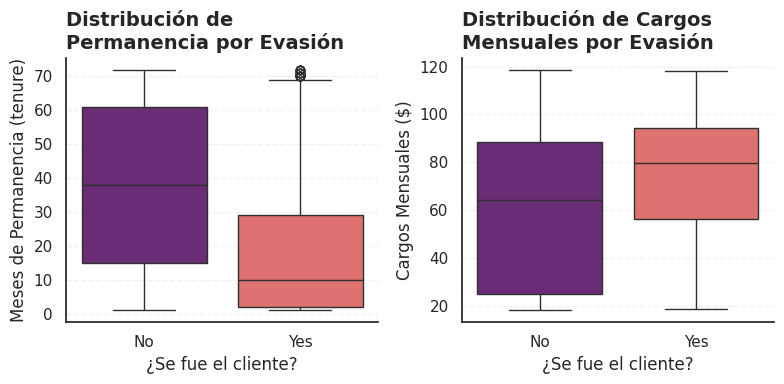

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(data=df_completo, x='Churn', y='tenure', ax=axs[0], palette='magma', hue='Churn', legend=False)
axs[0].set_title('Distribución de\nPermanencia por Evasión', fontsize=14, fontweight='bold', loc='left')
axs[0].set_xlabel('¿Se fue el cliente?')
axs[0].set_ylabel('Meses de Permanencia (tenure)')

sns.boxplot(data=df_completo, x='Churn', y='Charges.Monthly', ax=axs[1], palette='magma', hue='Churn', legend=False)
axs[1].set_title('Distribución de Cargos\nMensuales por Evasión', fontsize=14, fontweight='bold', loc='left')
axs[1].set_xlabel('¿Se fue el cliente?')
axs[1].set_ylabel('Cargos Mensuales ($)')

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

Los diagramas de caja revelan que los clientes que se van tienen una mediana de permanencia inferior a los 10 meses, concentrando el riesgo en el primer año. Por otro lado, la distribución de cargos mensuales para el grupo "Churn: Yes" se desplaza hacia valores más altos (mediana cercana a $80), evidenciando que la fuga no es aleatoria, sino que afecta a clientes de alto valor.

###**3.4-.Matriz de Correlación**

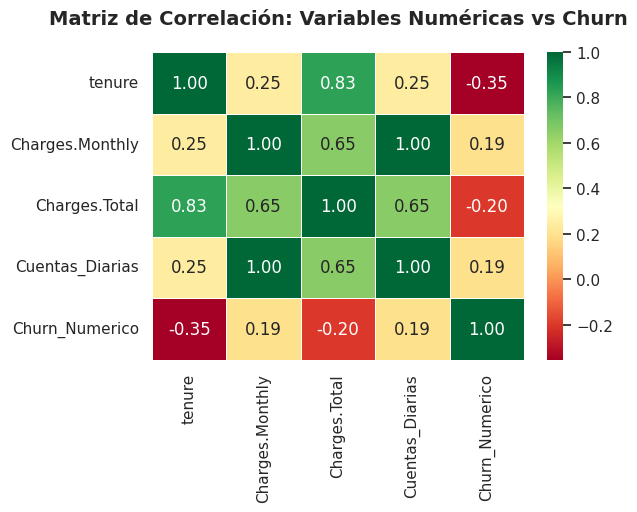

In [35]:
df_correlacion = df_completo.copy()
df_correlacion['Churn_Numerico'] = df_correlacion['Churn'].map({'Yes': 1, 'No': 0})

columnas_interes = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Churn_Numerico']
matriz_corr = df_correlacion[columnas_interes].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(matriz_corr, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=0.5)

plt.title('Matriz de Correlación: Variables Numéricas vs Churn', fontsize=14, fontweight='bold', pad=20)
plt.show()

La matriz confirma una correlación negativa entre la permanencia y la evasión (-0,35), siendo la variable con mayor peso estadístico. Las variables de costo (mensual y diario) presentan una correlación positiva moderada (0,19), ratificando que el precio es un factor contribuyente al abandono.

##**4-.Conclusiones e Insights**

Tras el análisis exhaustivo de los datos, se han extraído las siguientes conclusiones fundamentales sobre el fenómeno de la evasión en la compañía:



*   **Perfil Crítico de Abandono:**  La fuga de clientes no es uniforme. Se concentra en usuarios con contratos mes a mes, que utilizan cheque electrónico como medio de pago y que tienen una facturación superior al promedio (~$80 USD).

*   **La "Barrera del Primer Año":**  El análisis de permanencia (tenure) indica que el riesgo de Churn es máximo durante los primeros 12 meses. Si un cliente supera los 18-24 meses, la probabilidad de que permanezca a largo plazo aumenta drásticamente.

*   **Sensibilidad al Precio:**  Los clientes de mayor valor (los que más servicios contratan y más pagan mensualmente) son paradójicamente los más propensos a irse. Esto sugiere que no perciben una relación costo-beneficio competitiva frente a otras opciones del mercado.

*   **Ineficiencia en Métodos de Pago Manuales:**  Existe una correlación clara entre el uso de métodos de pago no automáticos (como el cheque electrónico) y la deserción, posiblemente por la fricción que genera el proceso de pago mensual o la falta de vinculación bancaria.





##**5-. Recomendaciones**

Basándose en los hallazgos anteriores, se proponen las siguientes acciones estratégicas para reducir el Churn Rate:


*   Plan de Incentivos de Migración Contractual: Implementar una campaña de descuentos o beneficios exclusivos para clientes en modalidad "mes a mes" que acepten migrar a contratos de 1 o 2 años. El objetivo es aumentar el costo de salida y estabilizar la base.
*   Estrategia de Fidelización Temprana: Crear un programa de Onboarding y beneficios durante el primer año de servicio (meses 1 a 12). Se pueden ofrecer servicios adicionales gratuitos temporalmente para fortalecer el vínculo antes de que el cliente llegue a su zona crítica de deserción.

*   Optimización de Métodos de Pago: Ofrecer incentivos únicos (como un pequeño descuento en la factura) a los clientes que cambien de cheque electrónico a débito automático o tarjeta de crédito. Esto automatiza la relación y reduce las bajas por olvido o fricción administrativa.

*   Revisión de la Propuesta de Valor para Segmentos de Alto Costo: Realizar un estudio comparativo de precios en los paquetes que superan los $75 USD. Es necesario asegurar que los clientes que más pagan reciban una atención preferencial o servicios de valor agregado (soporte premium, mayor velocidad, etc.) para justificar el costo.





